<a href="https://colab.research.google.com/github/ZacharyFry1/DD-Science-Cohort15/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 – Predicting Future Transactions



## Problem Definition



The goal of this project is to predict whether or not a future customer will make a transaction based on their previous transaction data. This is a supervised binary classification problem because the customer will either make a transaction or they will not. This project will use Naive Bayes classification.

## Data Collection




2. Load Pandas, Numpy, and Matplotlib..

Importing pandas, matplotlib, numpy, and seaborn in addition to sklearn, specifically Gaussian NB model.

In [ ]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

3. Load data Train.csv from the Google Drive folder.

Reading the csv file that contains our data.

In [ ]:
url = ' https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv'
transaction_data = pd.read_csv(url)

In [ ]:
transaction_data.shape

(180000, 53)

In [ ]:
transaction_data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,179990,179991,179992,179993,179994,179995,179996,179997,179998,179999
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,179990,179991,179992,179993,179994,179995,179996,179997,179998,179999
ID_code,train_0,train_1,train_2,train_3,train_4,train_5,train_6,train_7,train_8,train_9,...,train_179990,train_179991,train_179992,train_179993,train_179994,train_179995,train_179996,train_179997,train_179998,train_179999
target,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
var_0,8.9255,11.5006,8.6093,11.0604,9.8369,11.4763,11.8091,13.558,16.1071,12.5088,...,10.0158,11.0303,10.3811,8.6353,15.7964,8.9112,8.2722,12.4902,8.4894,11.6252
var_1,-6.7863,-4.1473,-2.7457,-2.1518,-1.4834,-2.3182,-0.0832,-7.9881,2.4426,1.9743,...,-6.2072,-4.4768,-1.6522,-3.9536,-1.0888,-4.49,7.1923,-2.9379,0.7048,3.3959
var_2,11.9081,13.8588,12.0805,8.9522,12.8746,12.608,9.3494,13.8776,13.9307,8.896,...,12.5506,12.4445,10.5636,12.4717,17.2377,11.3795,16.73,6.5901,11.1518,11.5558
var_3,5.1187,5.6208,6.9427,5.8428,5.9405,4.5322,6.1961,5.689,4.4514,6.0637,...,5.8199,4.1073,5.7018,4.0501,4.1423,5.4164,4.9698,4.7242,4.637,4.2003
var_4,5.747,8.0851,5.9525,8.245,7.6784,5.979,7.9232,7.1971,9.0827,7.9682,...,9.1829,7.5998,9.8771,8.6818,7.7214,8.3309,5.4907,9.1423,8.1321,7.4666
var_5,14.0137,14.0239,14.1929,13.8463,13.8481,13.638,14.1629,14.2919,14.0654,13.9639,...,13.8532,13.812,14.193,14.2331,14.1565,14.1869,14.0238,13.9133,14.2921,13.7381
var_6,0.5745,8.4135,7.3124,11.9704,7.8895,1.2589,13.3058,10.9699,-3.0572,0.8071,...,-1.2734,3.6838,2.2785,13.1255,6.82,12.8219,11.9933,12.2314,6.9582,12.959


## Data Cleaning

4. Examine the data using tools we have used in class.

1. If there are data cleaning issues, develop recommendations for how to deal with them.



Before committing to any changes in my data, I will make a copy of the DataFrame. Next I am going to see if any columns look like they would not help the model. It appears that ID_code and 0 will not help our model.

In [ ]:
transaction_data_clean = transaction_data.copy()
transaction_data_clean.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


### Drop Columns

Here I will be dropping the ID_code and Unamed: 0 columns.

In [ ]:
transaction_data_clean.drop('ID_code', axis= 1, inplace = True)

In [ ]:
transaction_data_clean.head()

,Unnamed: 0,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
transaction_data_clean.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
transaction_data_clean.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
transaction_data_clean.tail()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,22.3368,11.4176,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,16.0279,15.7685,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,15.2717,7.7995,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,20.4504,29.9869,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760
179999,0,11.6252,3.3959,11.5558,4.2003,7.4666,13.7381,12.9590,3.8168,8.5698,...,5.0415,-2.4210,-3.6829,14.2422,1.0741,26.3943,4.1482,11.9539,2.9846,15.6002


Checking my work. Everything looks good. The correct columns were dropped and the data looks a lot better.

### Checking For Null Values

In [ ]:
transaction_data_clean.isna()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
transaction_data_clean.isna().sum().sum()

0

Suprisingly there is no null values. That's good.

### Check for Target Values

The target column contains our target values. I will check to see the counts of the 0's and 1's.

In [ ]:
transaction_data_clean['target'].value_counts()

,count
target,
0,161960
1,18040


In this instance far more people didn't make a transaction (0) than did (1). There are 161,960 0's (no transaction) and 18040 1's (transaction made).

## Exploratory Data Analysis



### Feature Correlations

6. Produce some visual analysis of the data – like plots showing the distributions of all variables. Recall that Gaussian Naive Bayes assumes the predictors are normally distributed. Note: you might have to do multiple plots in groups.

There is too much data to do a pair plot. Instead I did a correlation map.

In [ ]:
transaction_data_clean.shape

(180000, 51)

### Correlation Plot

Correlation heat map.

<Axes: >

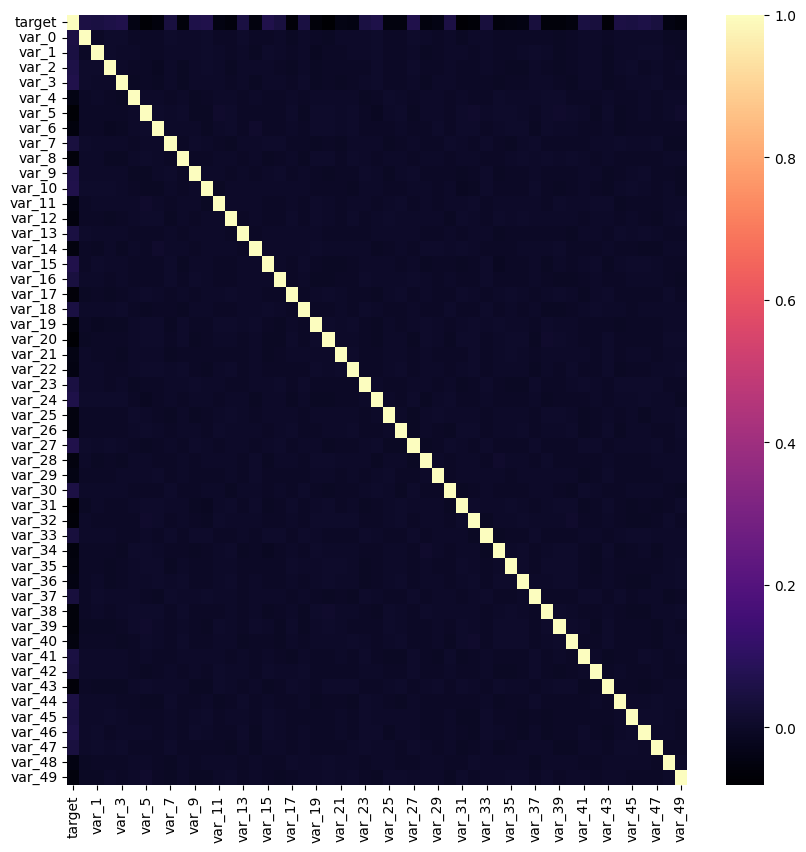

In [ ]:
corr = transaction_data_clean.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='magma',annot = False)

### Histogram For All Variables

Histograms for all the variables.

array([[<Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'var_0'}>,
        <Axes: title={'center': 'var_1'}>,
        <Axes: title={'center': 'var_2'}>,
        <Axes: title={'center': 'var_3'}>,
        <Axes: title={'center': 'var_4'}>,
        <Axes: title={'center': 'var_5'}>],
       [<Axes: title={'center': 'var_6'}>,
        <Axes: title={'center': 'var_7'}>,
        <Axes: title={'center': 'var_8'}>,
        <Axes: title={'center': 'var_9'}>,
        <Axes: title={'center': 'var_10'}>,
        <Axes: title={'center': 'var_11'}>,
        <Axes: title={'center': 'var_12'}>],
       [<Axes: title={'center': 'var_13'}>,
        <Axes: title={'center': 'var_14'}>,
        <Axes: title={'center': 'var_15'}>,
        <Axes: title={'center': 'var_16'}>,
        <Axes: title={'center': 'var_17'}>,
        <Axes: title={'center': 'var_18'}>,
        <Axes: title={'center': 'var_19'}>],
       [<Axes: title={'center': 'var_20'}>,
        <Axes: title={'center': 'var_21

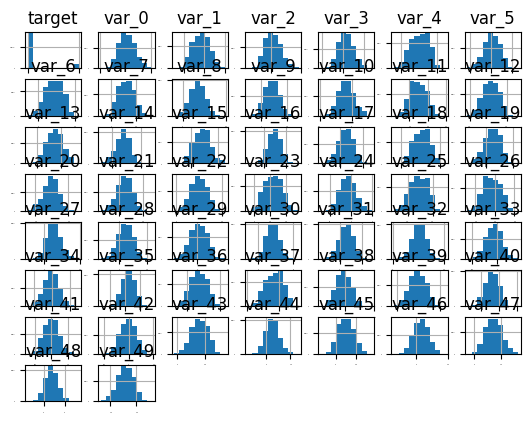

In [ ]:
transaction_data_clean.hist(xlabelsize = 0.1, ylabelsize = 0.1)


7. NOTE: the ‘target’ column indicates a successful transaction (‘1’) or a no-transaction (‘0’). Verify these are the only values in that column.

### Data Verification

Verifying there are no other values in the target column other than 0 and 1. There are 180,000 rows so we should have 180,000 values in the target column. I've verified we do and that the sum of the 0 and 1s is 180,000.

In [ ]:
transaction_data_clean.shape

(180000, 51)

In [ ]:
transaction_data_clean['target'].value_counts()

,count
target,
0,161960
1,18040


In [ ]:
transaction_data_clean['target'].value_counts().sum()

180000

8. Check the correlation values between all **predictor columns** to ensure there are no substantial correlations between predictors. This is important to support the decision to classify the ‘target’ using Naïve Bayes.

Here I am seeing which variables affect the target the most because it is not visually clear in the correlation plot. I will have to unstack the correlations and see what their values are in order to assess what affects the target the most.

In [ ]:
corr_unstacked = corr.unstack()
corr_unstacked.sort_values(ascending = False)

,,0
target,target,1.000000
var_25,var_25,1.000000
var_22,var_22,1.000000
var_21,var_21,1.000000
var_20,var_20,1.000000
...,...,...
var_5,target,-0.070015
target,var_31,-0.073296
var_31,target,-0.073296
var_20,target,-0.080689


In [ ]:
corr_unstacked_not_self = corr_unstacked[ corr_unstacked !=1 ]
corr_unstacked_not_self

target  var_0     0.052904
        var_1     0.049916
        var_2     0.055450
        var_3     0.066924
        var_4    -0.042073
                    ...   
var_49  var_44    0.000081
        var_45   -0.003859
        var_46   -0.001607
        var_47   -0.000892
        var_48    0.003141
Length: 2550, dtype: float64

Sorting the variables based on how correlated to the target they are.

In [ ]:
corr_unstacked_not_self['target'].sort_values(ascending = False)

,0
var_3,0.066924
var_27,0.064868
var_10,0.063565
var_15,0.062887
var_24,0.059306
var_9,0.059227
var_46,0.056902
var_2,0.055450
var_0,0.052904
var_30,0.052457


In [ ]:
corr_pair = corr_unstacked_not_self.abs().sort_values(kind='quicksort', ascending = False)
corr_pair

target  var_20    0.080689
var_20  target    0.080689
var_31  target    0.073296
target  var_31    0.073296
        var_5     0.070015
                    ...   
var_43  var_18    0.000019
var_39  var_41    0.000018
var_41  var_39    0.000018
var_45  var_48    0.000009
var_48  var_45    0.000009
Length: 2550, dtype: float64

In [ ]:
corr_pair = corr_unstacked_not_self.sort_values(kind='quicksort', ascending = False)
corr_pair[::1].head(10)

,,0
target,var_3,0.066924
var_3,target,0.066924
var_27,target,0.064868
target,var_27,0.064868
var_10,target,0.063565
target,var_10,0.063565
var_15,target,0.062887
target,var_15,0.062887
var_24,target,0.059306
target,var_24,0.059306


In [ ]:
corr_pair = corr_unstacked_not_self.abs().sort_values(kind='quicksort', ascending = False)
corr_pair[::1].head(10)

target  var_20    0.080689
var_20  target    0.080689
var_31  target    0.073296
target  var_31    0.073296
        var_5     0.070015
var_5   target    0.070015
var_3   target    0.066924
target  var_3     0.066924
var_27  target    0.064868
target  var_27    0.064868
dtype: float64

It appears variable variable 20 has the strongest negative correlation (and the strongest correlation overall) with the target column, and variable 3 has the strongest positive correlation with the target column. Despite these having the highest positive and negative correlation values in the data set, nothing is strongly correlated with the target which means the Naive Bayes model should be fairly accurate in predicting whether or not the customer will make a transaction or not.

9. Create two data frames: one with all successful transactions, one with all unsuccessful transactions. **Make sure they are copies and not slices**.

### Creating Two DataFrames

In [ ]:
transaction_data_clean_1 = transaction_data_clean.copy()

In [ ]:
target_transaction_mask = transaction_data_clean_1['target'] == 1
target_transaction_mask

,target
0,False
1,False
2,False
3,False
4,False
...,...
179995,False
179996,False
179997,False
179998,False


Checking to make sure the dataframe has only transactions where the transaction was made.

In [ ]:
transaction_data_successful_transactions = transaction_data_clean_1[target_transaction_mask]
transaction_data_successful_transactions.shape

(18040, 51)

In [ ]:
target_notransaction_mask = transaction_data_clean_1['target'] == 0
target_notransaction_mask

,target
0,True
1,True
2,True
3,True
4,True
...,...
179995,True
179996,True
179997,True
179998,True


Checking to make sure the dataframe has the transactions where no transaction was made.

In [ ]:
transaction_data_no_transactions = transaction_data_clean_1[target_notransaction_mask]
transaction_data_no_transactions.shape

(161960, 51)

Above I created two dataframes: dataframe 1. transaction_data_successful is a dataframe where only the target column with values of 1 were kept. The second dataframe I created 2. transaction_data_no_transactions is a dataframe where only the target column with values of 0 were kept. I checked the shape to make sure the values in each dataframe made sense.

## Data Processing

~~10. Create two data frames: one with all the predictor columns (everything except for Unnamed: 0, ID_code and target) and one with just the target. Make sure they are copies and not slices.~~

~~11. Define a Gaussian Naïve Bayes model using Sklearn.~~

~~12. Divide the two data frames you created in step #10 into training and testing subsets.~~

~~13. Train the model using the training subset of the dataset.~~

~~14. Test the model using the testing subset of the dataset. Calculate and report the accuracy.~~

~~15. Perform a cross-validation loop to calculate the accuracy of your model. Report that accuracy. How does it compare to the accuracy you calculated in #14?~~

~~16. Plot a histogram of the accuracy scores you generated in your cross-validation loop. What do you notice about the distribution of accuracy scores?~~

~~17.  Present the confusion matrix and the results of your Classification Report (sklearn.metrics.classification_report). What do you notice?  ## **What is a classification report?**~~

~~18. The training data is very skewed towards non-successful transactions (about 90% of the training data has ‘target’==0). Remove enough non-successful transaction rows so that your remaining training data is 50%/50% split between successful and non-successful transactions. Hint: you can use the data frames you created in step #9.~~

~~19. Repeat the cross-validation process on this data set. Report what your cross-validation accuracy is in this 50/50 case.~~



Creating a dataframe with everything but the unamed, ID and target columns are removed.
**transaction_data_everything**

In [ ]:
transaction_data_everything = transaction_data.copy()
transaction_data_everything.drop(['Unnamed: 0', 'ID_code', 'target'], axis = 1, inplace = True)
transaction_data_everything.shape

(180000, 50)

Creating a dataframe with just the target column. **transaction_data_target**

In [ ]:
transaction_data_target = transaction_data.copy()
transaction_data_target_df = transaction_data_target.drop(columns=[col for col in transaction_data_target.columns if col != 'target'])
transaction_data_target_df.shape

(180000, 1)

11. Define a Gaussian Naïve Bayes model using Sklearn.

### Gausian Naive Bayes Model

Create two different dataframes, y is just the target, X is all the other variables.

In [ ]:
gnb_model = GaussianNB()
y = transaction_data['target'].copy()
X = transaction_data_clean.drop('target', axis = 1, inplace = False)

In [ ]:
y.shape

(180000,)

At first I was getting many errors because without the cleaned data I had strings trying to convert to integers, but I ended up using the cleaned up database I made transaction_data_clean and the test worked. Training the model below.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
gnb_model.fit(X_train, y_train)
y_pred = gnb_model.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 45000 points : 4086


The accuracy of the model is roughly 90%, as seen in the output below.

In [ ]:
1 - 4086/45000

0.9092

### Cross Validation


In [ ]:
np.zeros?

In [ ]:
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 25%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [ ]:
accuracy_scores = cross_validate(X, y, 100)
print(round(accuracy_scores.mean(), 6))

0.911112


The cross validation reads the average accuracy across 100 iterations as 91%, very close to the model before cross validation.

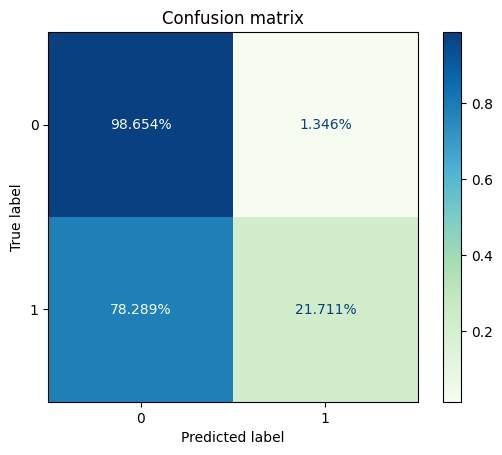

In [ ]:
all_data_CM = metrics.ConfusionMatrixDisplay.from_estimator(
    gnb_model,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.3%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix_1.png')

The confusion matrix shows this GNB model performs far better with those that did not make a transaction (0), with those that did (1). This makes sense because our data set is heavily skewed with people who did not make a transaction (0).

### Classification report


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     40477
           1       0.64      0.22      0.32      4523

    accuracy                           0.91     45000
   macro avg       0.78      0.60      0.64     45000
weighted avg       0.89      0.91      0.89     45000



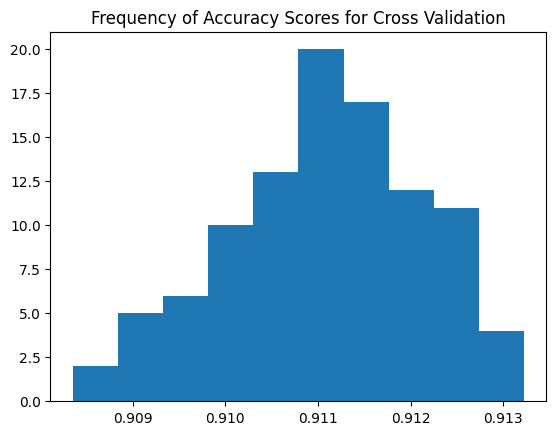

In [ ]:
plt.hist(accuracy_scores)
plt.title('Frequency of Accuracy Scores for Cross Validation')
plt.show()

Histogram plot showing the accuracy scores of out Gausian Bayes Naive Model. It looks like 91.15% accuracy occured at the highest rate out of 100 iterations, happening nearly 20 times.

### **New 50/50 data set.**

To perform a better model for predicting future transactions, I will make a new dataframe with an even number of 0's and 1's randomly chosen from the data set. This should help the model generate more accurate predictions, because the data will not be biased toward the 0's or the 1's.

In [ ]:
transaction_data_successful_transactions.sample?

In [ ]:
sample_no_transaction = transaction_data_successful_transactions.sample(18040)
sample_transaction = transaction_data_no_transactions.sample(18040)

In [ ]:
concact_data_frames = pd.concat([sample_no_transaction, sample_transaction], ignore_index = True, sort=False)

In [ ]:
concact_data_frames

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,1,10.8440,-7.2410,9.9310,5.1425,6.4285,13.9274,2.6122,31.2544,1.0235,...,5.7059,3.4205,-2.4941,14.2591,2.6725,11.5568,5.5235,7.8240,1.8852,16.1592
1,1,13.0561,-1.8609,8.9123,5.4992,8.0123,13.5550,4.9360,21.1513,20.9063,...,6.0811,7.9581,3.8479,14.9148,0.7760,18.6626,-5.1425,9.3967,4.0404,15.2477
2,1,16.7372,-4.5853,13.6260,7.0136,6.3767,13.9784,-0.6462,6.0818,14.6518,...,5.4173,0.8852,0.2839,19.9617,3.3609,23.2174,5.4337,14.0610,0.8535,10.7958
3,1,10.9066,0.3012,14.8581,4.3368,9.5383,13.7388,0.5751,11.1604,16.2242,...,6.4139,3.0332,1.6163,21.9305,-0.9881,3.3983,10.3171,5.0866,3.4270,22.1024
4,1,6.4882,5.2227,9.1455,6.4563,8.9954,13.9243,3.2376,4.2285,12.2532,...,5.2888,-3.4615,5.5915,10.8630,7.2812,16.6844,10.3884,11.2462,-0.4944,11.8443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36075,0,10.3893,-6.3768,17.2361,4.5405,6.5712,14.2010,10.7535,16.0629,7.5494,...,4.9325,-4.2818,-3.4164,26.8282,-1.4632,35.8531,0.6426,5.1144,3.4246,19.7863
36076,0,9.2262,-2.7771,7.1293,5.8444,8.0393,14.1737,11.3041,15.6530,6.3989,...,5.2983,2.4727,-3.9899,13.2935,0.5649,22.0652,2.5629,9.1131,1.5540,13.2508
36077,0,10.5155,-5.1808,10.2143,4.7477,7.1390,14.2846,14.6005,9.3509,11.7373,...,5.2407,2.9352,-4.0948,16.5153,0.5797,0.5520,4.1571,5.3862,3.2690,19.6090
36078,0,11.3516,-0.5370,16.3555,4.7336,8.7250,14.1151,2.0741,0.0421,0.6366,...,5.5086,5.4095,-3.4756,15.9674,0.5407,8.0710,-0.3512,6.2648,-0.0299,14.4445


In [ ]:
gnb_model = GaussianNB()
b = concact_data_frames['target'].copy()
A = concact_data_frames.drop('target', axis = 1, inplace = False)

In [ ]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.25, random_state=0)
gnb_model.fit(A_train, b_train)
b_pred = gnb_model.predict(A_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (A_test.shape[0], (b_test != b_pred).sum()))

Number of mislabeled points out of a total 9020 points : 2225


In [ ]:
def cross_validate(A, b, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 25%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    A_train, A_test, b_train, b_test = model_selection.train_test_split(A, b, test_size = 0.25)
    model_split_cv.fit(A_train, b_train)
    b_split_pred = model_split_cv.predict(A_test)
    accuracy_scores[i] = metrics.accuracy_score(b_test, b_split_pred)

  return accuracy_scores

In [ ]:
accuracy_scores = cross_validate(A, b, 100)
print(round(accuracy_scores.mean(), 6))

0.757401


The cross validation accuracy of this new split data is around 76%. Lower than the dataframe with all the data in it. This makes sense considering there is substantially less data than the one used previously and the data is less biased in one direction.

## Data Visualization


20. Compare the results of your cross-validation with the whole training data and the reduced 50/50 training data

1. Present the confusion matrix and the results of your Classification Report (sklearn.metrics.classification_report)




**Confusion matrix from 50/50 split data.**

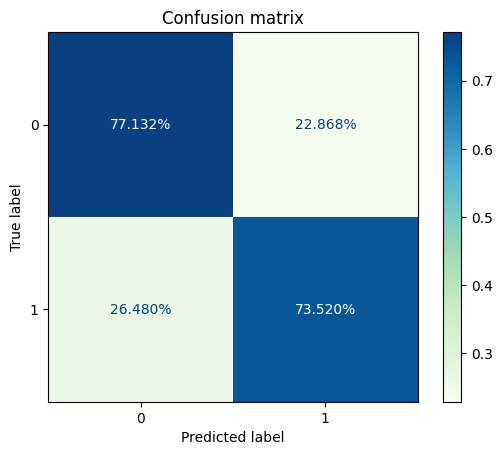

In [ ]:
fifty_fifty_split_CM = metrics.ConfusionMatrixDisplay.from_estimator(
    gnb_model,
    A_test,
    b_test,
    normalize = 'true',
    values_format = '.3%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

This confusion matrix shows that with this new 50/50 data set, we were able to predict if someone made the transaction 76% of the time. The confusion matrix with all the data in it was only able to predict if someone had a transaction 21% of the time. This indicates that the 50/50 model is better at predicting if someone will make a transaction.  

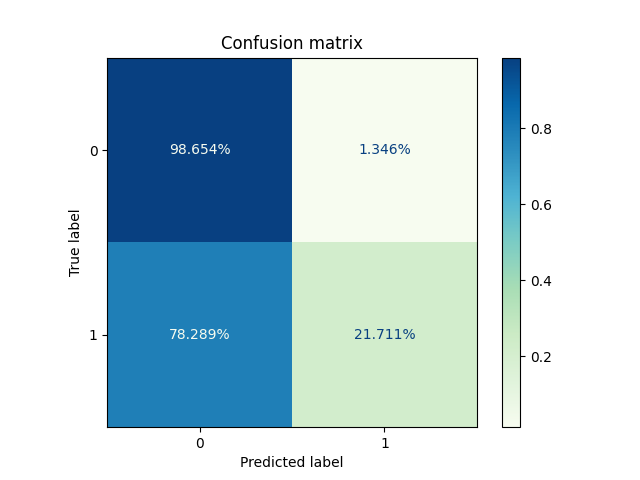

In [ ]:
Image('confusion_matrix_1.png')

This confusion matrix shows displays the results of all the data. It is very good at predicting the non-transactions (98% accuracy) but bad at predicting the transations (21% accuracy).

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(b_test, b_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      4526
           1       0.76      0.74      0.75      4494

    accuracy                           0.75      9020
   macro avg       0.75      0.75      0.75      9020
weighted avg       0.75      0.75      0.75      9020



All the metrics for the classifcation report are lower than they were for the classification report on the data frame with all the data in it. Because this 50/50 split represents more evenly distributed data, the scores from this classification are likely more accurate and bear a truer reflection of what the model and data are telling us.

## Communicate the Results

22. Communicate the results of your analysis.



Based on the results we can draw several conclusions from this data. The first is that it is heavily skewed toward people who did not make a transaction . This made the Naive Bayes Model bad at predicting who make a transaction in the future. When the data was split to evenly divide the people who had made a transaction and the people who didn't, the new Naive Bayes model was far better at predicting future transactions. With all the data, the model predicted if a prospective customer would make a transaction with 21% accuracy, and with the randomly sampled, evenly split data, the model predicted a person would make the transaction with 76% accuracy.

In addition to this, none of the variables had a strong correlation with the target and based on the histograms generated, they showed normal distribution, which is ideal for the Naive Bayes model. The classification report scores were higher for the model with all the data in it, but that is because the highly biased data was able to predict one of the variables very accurately. The second classification report showed lower scores, but this model was better at predicting future transactions and it's data was not biased.  

### Future Considerations

For projects in the future, I will do my best to ensure the data is not biased in one way or another before building my model to test the data. For a data set like this, I would like to test the second model I built with more real world data, to see how it performs.

## Submit Final Project

23. Upload your finished Jupyter notebook to your Project 1 student folder.
